Problem Statement:

Implement Breadth First Search algorithm, Use an undirected 
graph and develop a recursive algorithm for searching all the vertices of a graph or tree data 
structure.

In [1]:
# Cell 1: Import necessary libraries
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

In [2]:
# Cell 2: Create a tree-like undirected graph
def create_tree():
    # This is an undirected tree structure
    # Each node connects to its parent and children
    tree = {
        'A': ['B', 'C', 'D'],  # Root node with 3 children
        'B': ['A', 'E', 'F'],  # B connects to parent A and children E, F
        'C': ['A', 'G'],       # C connects to parent A and child G
        'D': ['A', 'H', 'I'],  # D connects to parent A and children H, I
        'E': ['B'],            # E connects to parent B
        'F': ['B'],            # F connects to parent B
        'G': ['C'],            # G connects to parent C
        'H': ['D'],            # H connects to parent D
        'I': ['D']             # I connects to parent D
    }
    return tree

In [3]:
# Cell 3: Function to visualize the tree with hierarchical layout
def visualize_tree(tree, visited=None, current=None, title="Tree"):
    """Draw the tree with optional highlighting for visited nodes and current node"""
    # Create a NetworkX graph
    G = nx.Graph()
    
    # Add edges from our tree dictionary
    for vertex, neighbors in tree.items():
        for neighbor in neighbors:
            G.add_edge(vertex, neighbor)
    
    # Set up the figure
    plt.figure(figsize=(10, 8))
    
    # Create a custom hierarchical layout to make it look like a tree
    pos = {
        'A': (0, 0),       # Root node at the top
        'B': (-3, -1),     # First level, left
        'C': (0, -1),      # First level, middle
        'D': (3, -1),      # First level, right
        'E': (-4, -2),     # Second level under B
        'F': (-2, -2),     # Second level under B
        'G': (0, -2),      # Second level under C
        'H': (2, -2),      # Second level under D
        'I': (4, -2)       # Second level under D
    }
    
    # Default node colors
    if visited is None:
        visited = []
    
    # Color scheme: lightblue=unvisited, green=visited, red=current
    node_colors = []
    for node in G.nodes():
        if node == current:
            node_colors.append('red')      # Current node
        elif node in visited:
            node_colors.append('green')    # Visited node
        else:
            node_colors.append('lightblue')  # Unvisited node
    
    # Draw the tree
    nx.draw(G, pos, with_labels=True, node_color=node_colors,
            node_size=700, font_weight='bold', font_size=15)
    
    plt.title(title)
    plt.show()


In [4]:
# Cell 5: Breadth-First Search (BFS) implementation
def bfs(tree, start, visualize=True):
    # Keep track of visited nodes
    visited = []
    # Queue to manage nodes to visit
    queue = deque([start])
    
    # Process nodes until queue is empty
    while queue:
        # Get the next vertex from queue
        current = queue.popleft()
        
        # Skip if already visited
        if current in visited:
            continue
        
        # Mark as visited
        visited.append(current)
        
        # Visualize current step
        if visualize:
            visualize_tree(tree, visited, current, f"BFS - Visiting: {current}")
            print(f"Visited: {current}")
        
        # Add unvisited neighbors to queue
        for neighbor in tree[current]:
            if neighbor not in visited:
                queue.append(neighbor)
    
    return visited


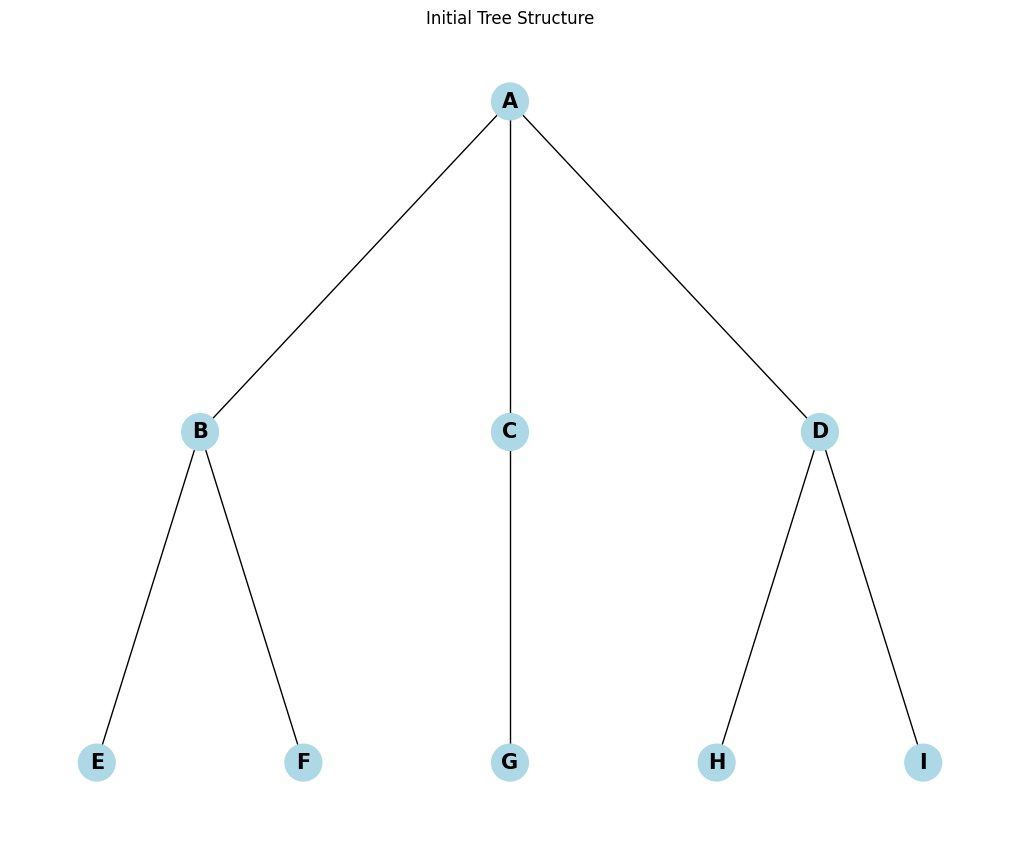

In [5]:
# Cell 6: Create the tree and visualize it
tree = create_tree()
visualize_tree(tree, title="Initial Tree Structure")


Running Breadth-First Search (BFS) starting from node 'A':


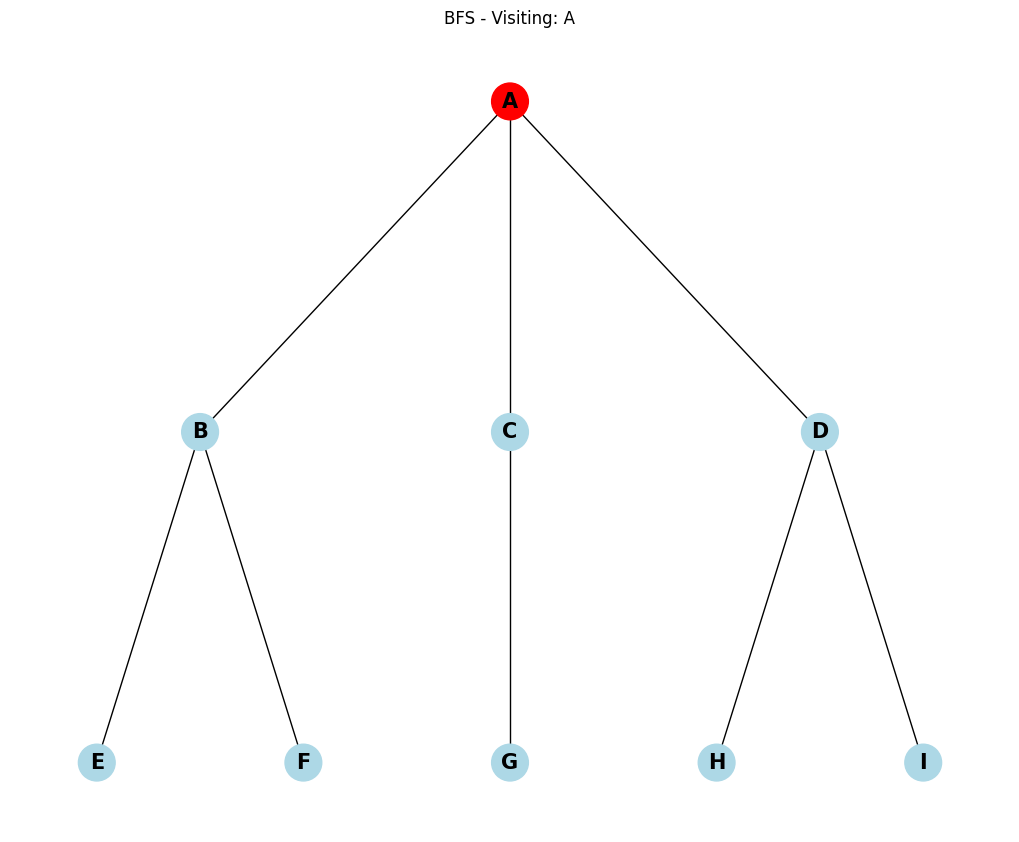

Visited: A


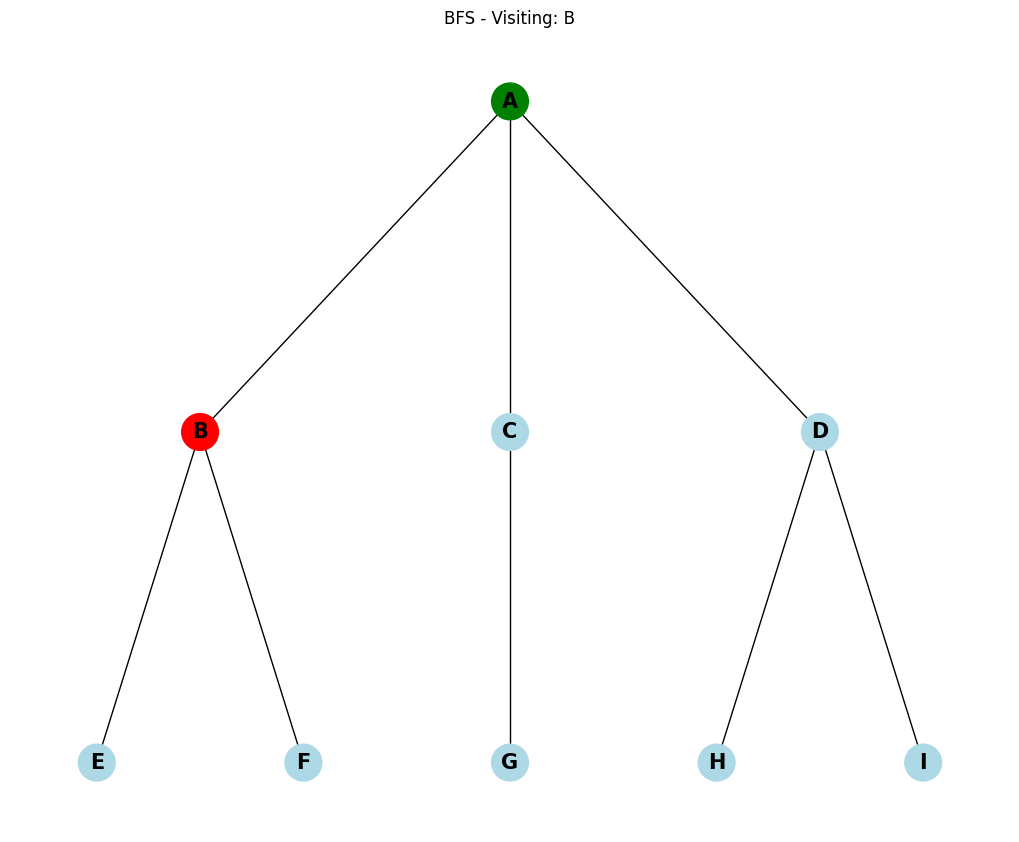

Visited: B


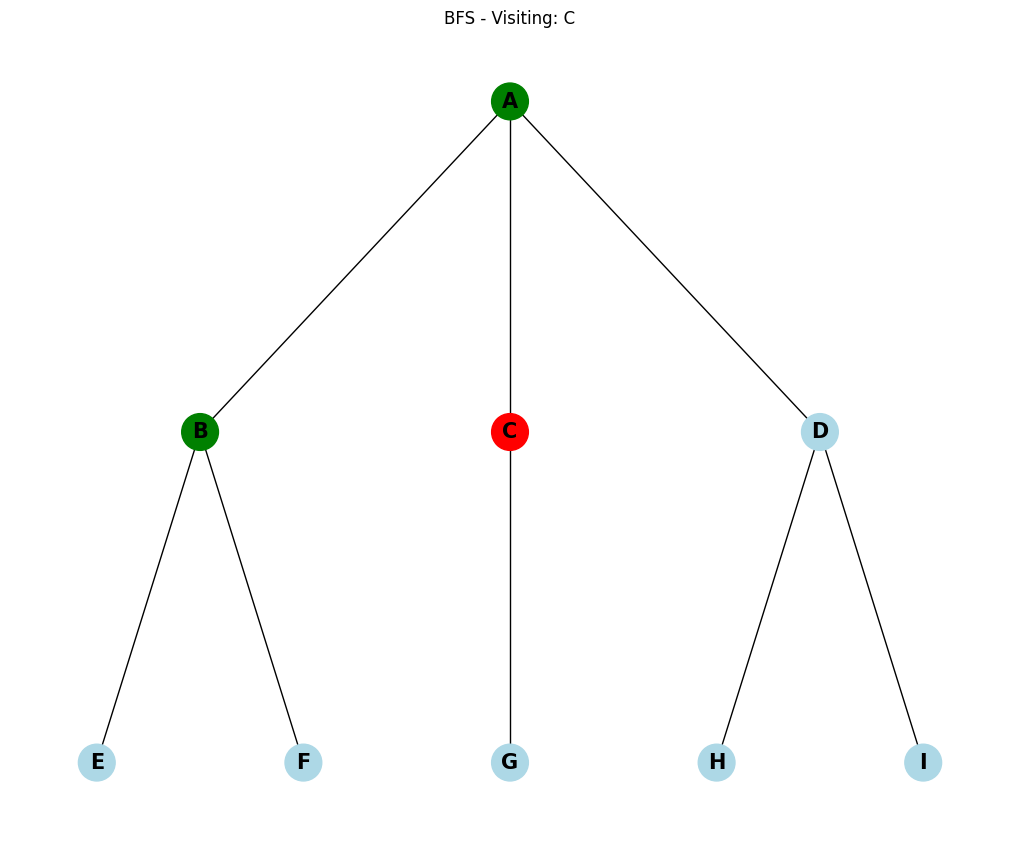

Visited: C


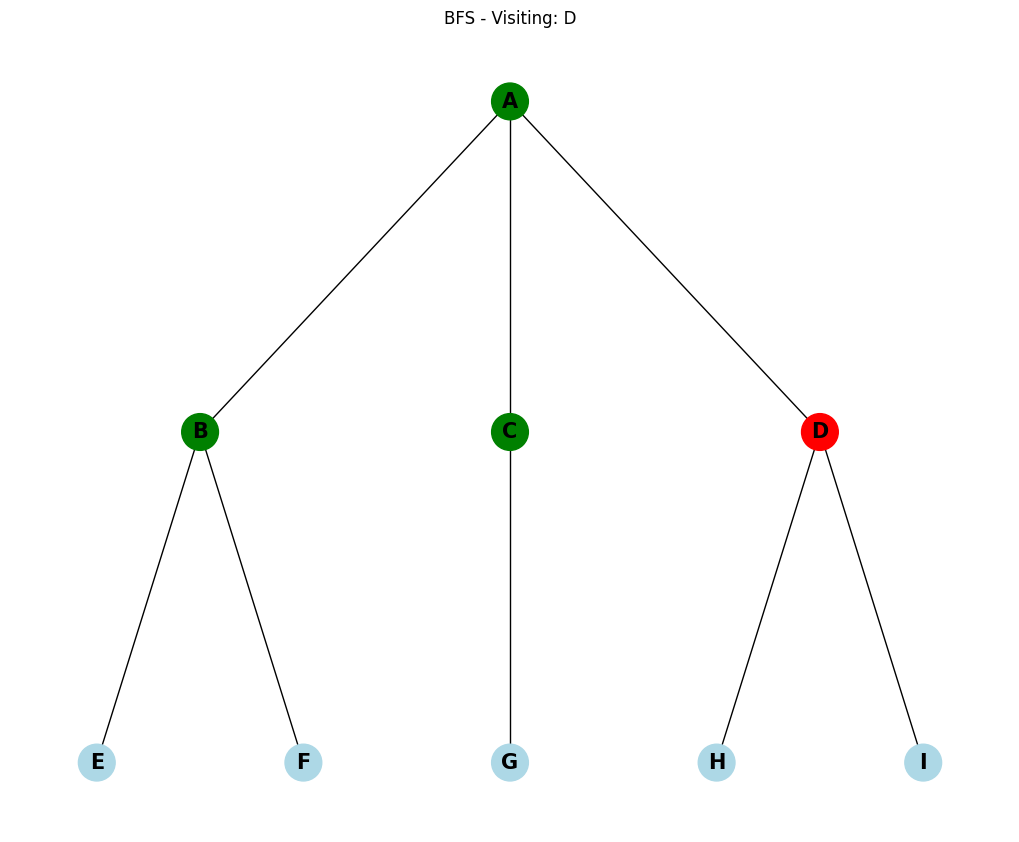

Visited: D


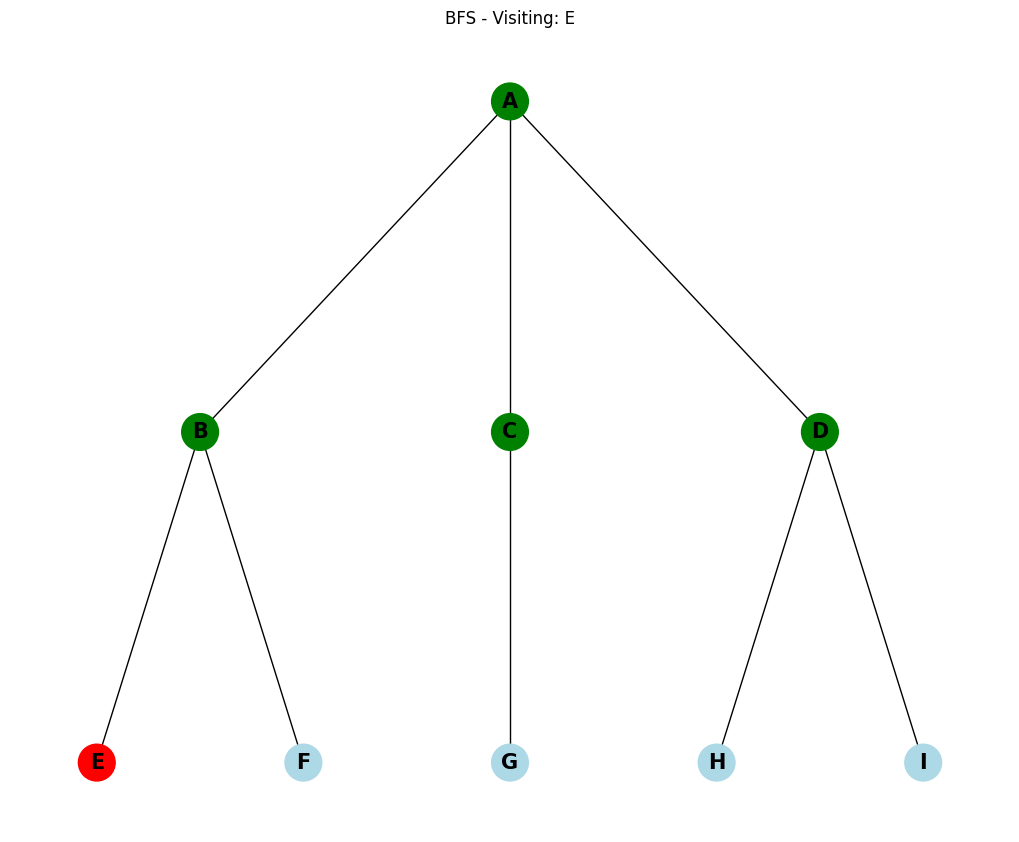

Visited: E


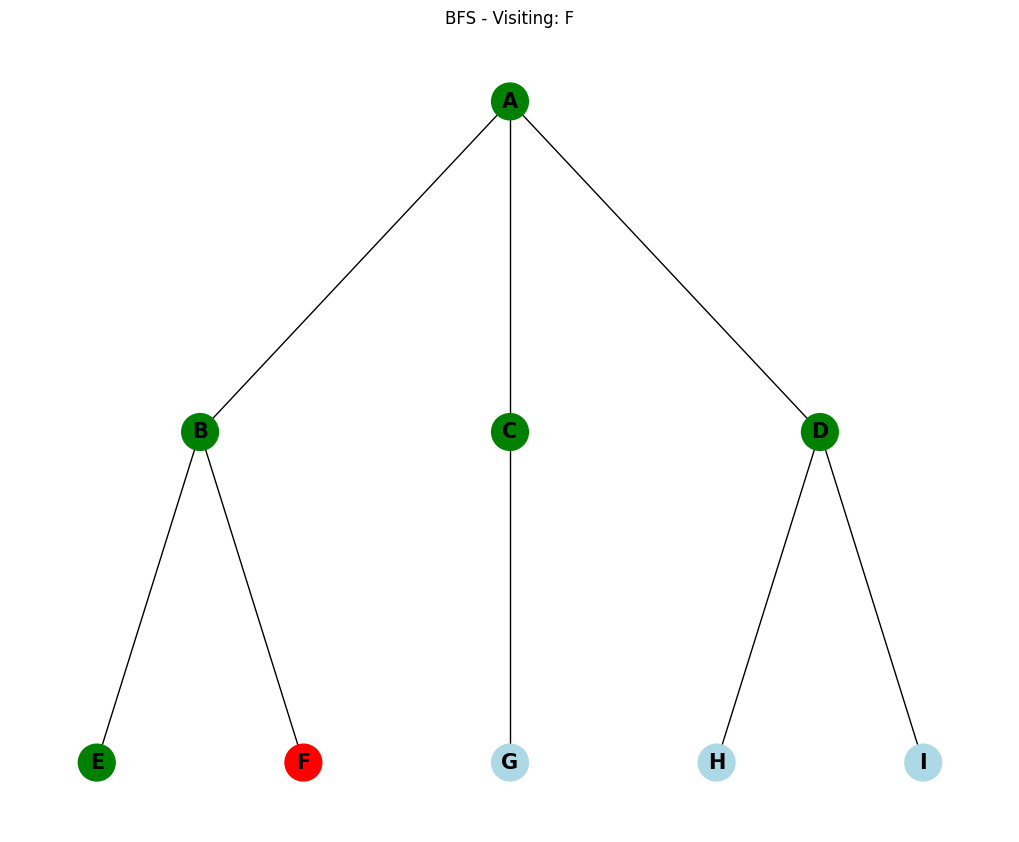

Visited: F


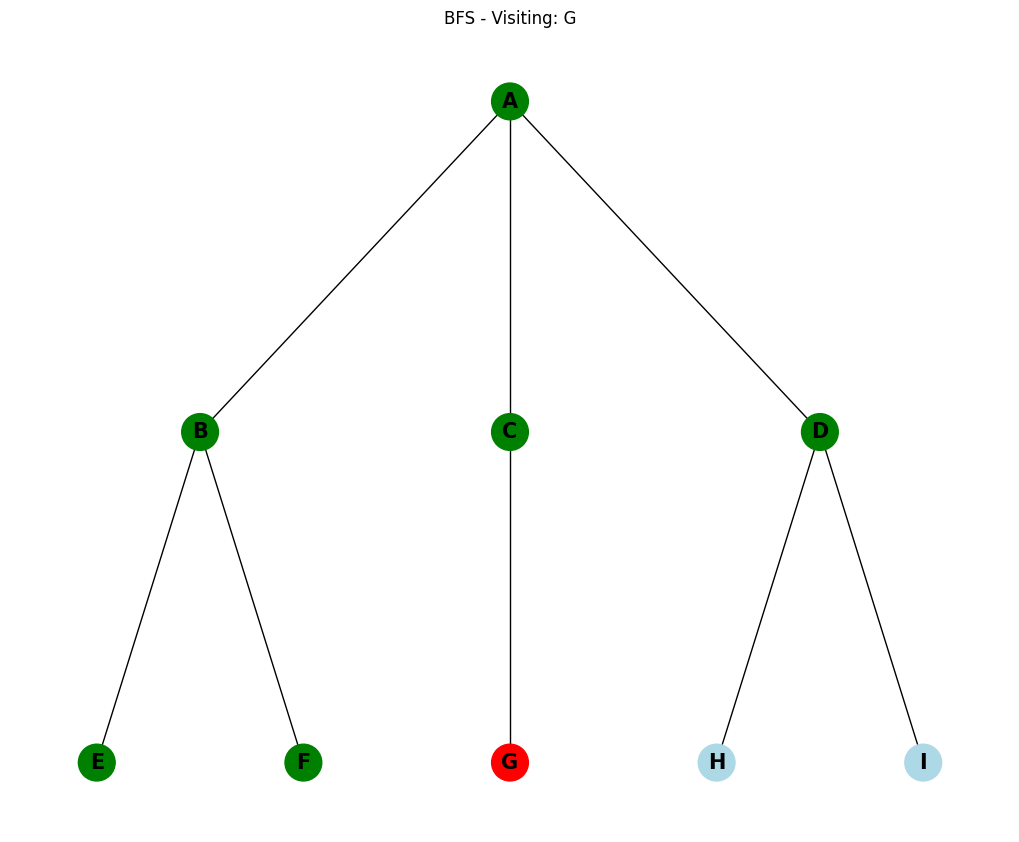

Visited: G


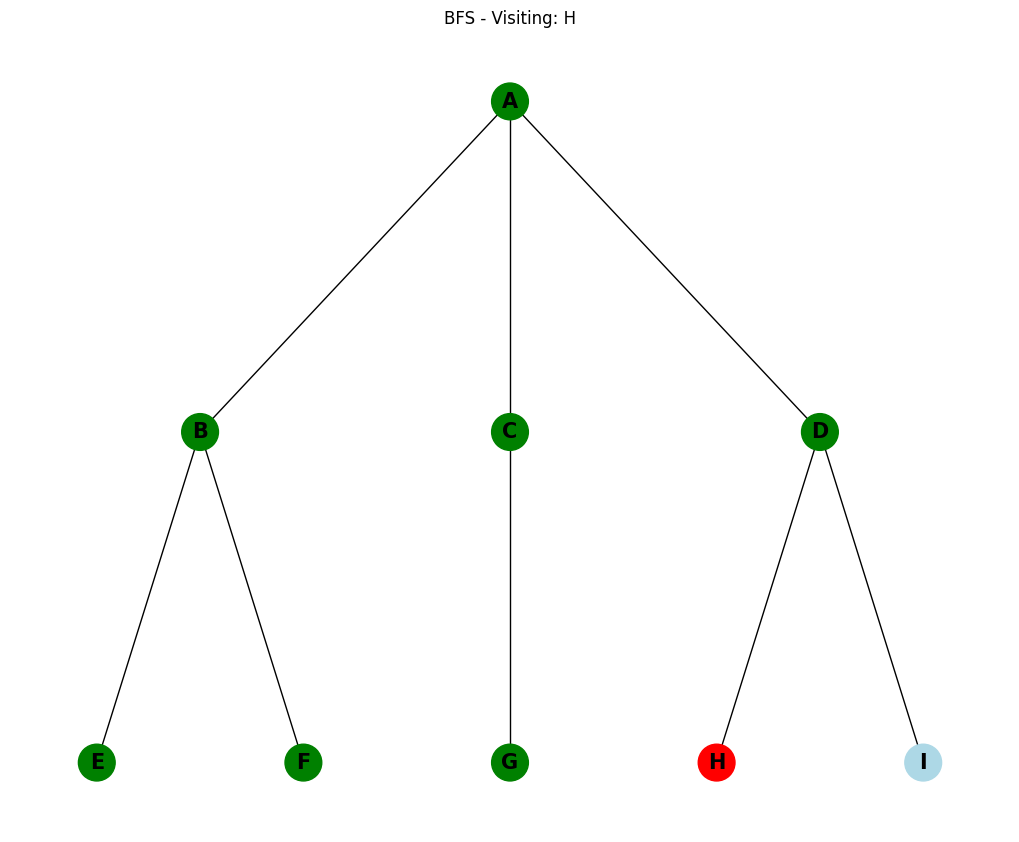

Visited: H


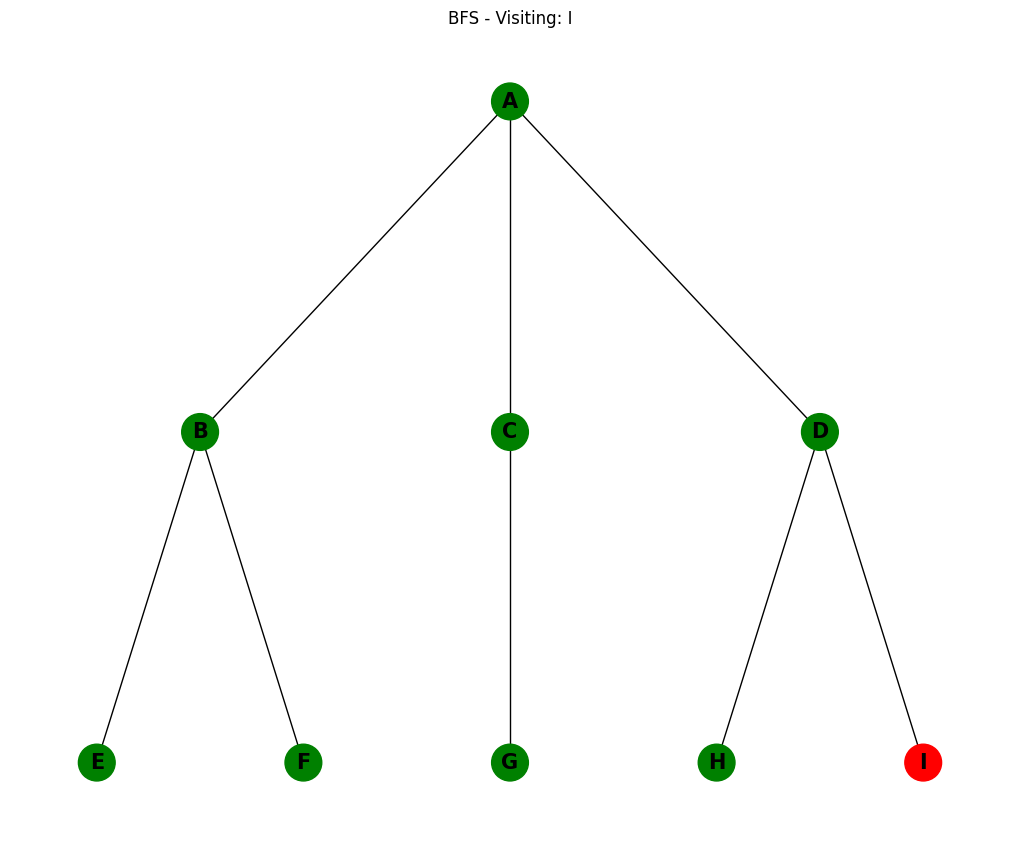

Visited: I

BFS traversal order: A -> B -> C -> D -> E -> F -> G -> H -> I


In [6]:
# Cell 8: Run BFS and show results
print("\nRunning Breadth-First Search (BFS) starting from node 'A':")
bfs_result = bfs(tree, 'A')
print(f"\nBFS traversal order: {' -> '.join(bfs_result)}")

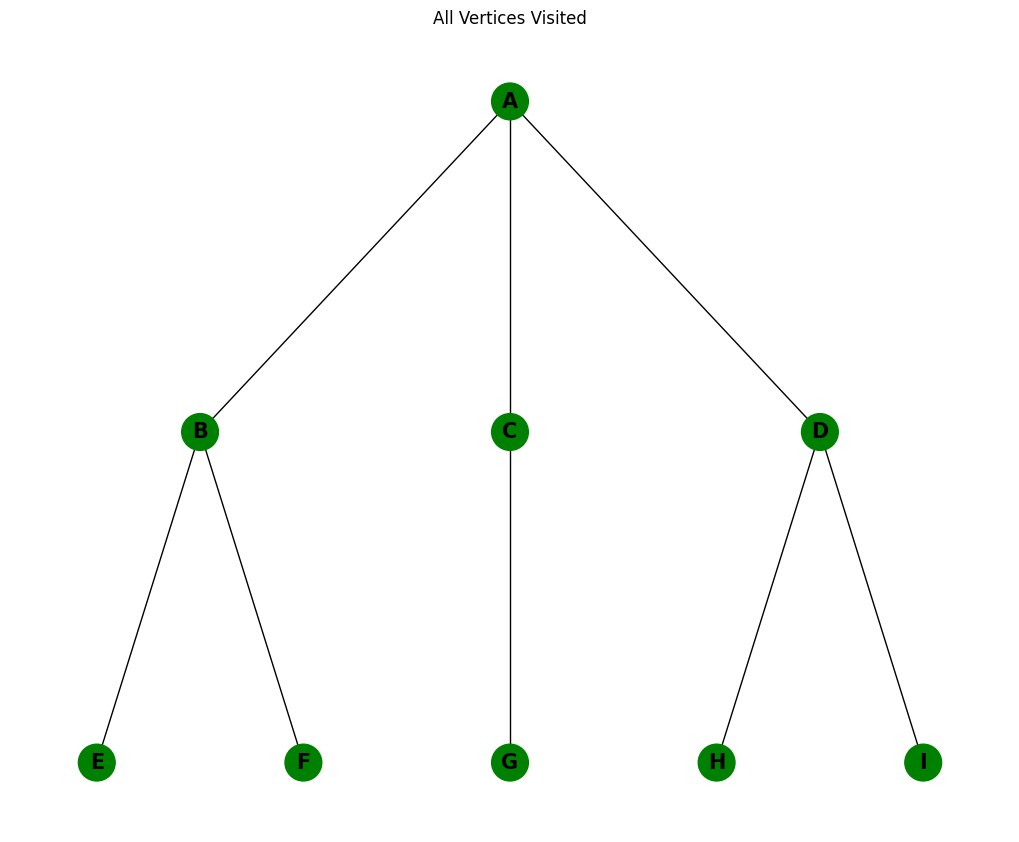

In [7]:
# Cell 10: Show final tree with all nodes visited
visualize_tree(tree, list(tree.keys()), title="All Vertices Visited")

# Breadth-First Search (BFS) Algorithm Implementation on Undirected Graphs

## 1. Aim

The aim of this project is to implement a breadth-first search (BFS) algorithm on an undirected graph structure, visualize the traversal process, and demonstrate how BFS can systematically explore all vertices of a graph.

## 2. Objectives

- Create and visualize an undirected graph structure
- Implement the breadth-first search algorithm
- Demonstrate the step-by-step traversal of the graph using BFS
- Visualize the BFS algorithm's execution by highlighting visited nodes
- Output the traversal order of vertices visited using BFS

## 3. Expected Output

The code will produce:
- A visualization of the initial undirected tree structure
- Step-by-step visualizations of the BFS algorithm execution, showing:
  - Currently visited node (in red)
  - Previously visited nodes (in green)
  - Unvisited nodes (in light blue)
- Console output showing the order of visited nodes during traversal
- A final visualization showing all nodes visited
- The complete traversal order (e.g., "A -> B -> C -> D -> E -> F -> G -> H -> I")

## 4. Prerequisites

- Python programming knowledge
- Understanding of:
  - Graph data structures
  - Breadth-first search algorithm
  - Queue data structure
- Python libraries:
  - matplotlib (for visualization)
  - networkx (for graph operations)
  - collections.deque (for queue implementation)

## 5. Theory

### a. Necessary Definitions and Explanations

**Graph**: A collection of nodes (vertices) connected by edges. In the code, the graph is represented as an adjacency list using a dictionary.

**Undirected Graph**: A graph where edges have no direction, meaning if there's an edge between vertices A and B, both A can reach B and B can reach A.

**Breadth-First Search (BFS)**: A traversal algorithm that explores a graph level by level, visiting all neighbors of a node before moving to the next level of nodes.

**Queue**: A first-in-first-out (FIFO) data structure used in BFS to keep track of nodes to visit next.

**Adjacency List**: A way to represent a graph where each vertex has a list of adjacent vertices connected to it. In the code, this is implemented as a dictionary.

### b. Computation

The BFS algorithm has a time complexity of O(V + E), where:
- V is the number of vertices
- E is the number of edges

For the specific tree in the code with 9 nodes (A through I) and 8 edges, the algorithm visits each node exactly once and checks each edge twice (once from each connected vertex).

Space complexity: O(V) for storing the visited nodes and the queue.

### c. Algorithms

**Breadth-First Search Algorithm**:

1. Create a queue and enqueue the starting vertex
2. Create a list to track visited vertices
3. While the queue is not empty:
   a. Dequeue a vertex
   b. If the vertex hasn't been visited:
      i. Mark it as visited
      ii. Enqueue all its unvisited neighbors

```python
def bfs(tree, start, visualize=True):
    visited = []
    queue = deque([start])
    
    while queue:
        current = queue.popleft()
        
        if current in visited:
            continue
        
        visited.append(current)
        
        if visualize:
            visualize_tree(tree, visited, current, f"BFS - Visiting: {current}")
            print(f"Visited: {current}")
        
        for neighbor in tree[current]:
            if neighbor not in visited:
                queue.append(neighbor)
    
    return visited
```

### d. Example

For the tree structure in the code:
```
    A
   /|\
  B C D
 /\  / \
E F G H I
```

BFS traversal starting from 'A' would proceed as:

1. Visit A (root)
2. Add A's neighbors (B, C, D) to the queue
3. Visit B (dequeued from queue)
4. Add B's unvisited neighbors (E, F) to the queue
5. Visit C (dequeued from queue)
6. Add C's unvisited neighbor (G) to the queue
7. Visit D (dequeued from queue)
8. Add D's unvisited neighbors (H, I) to the queue
9. Visit E, F, G, H, I in that order (dequeued from queue)

Final traversal order: A → B → C → D → E → F → G → H → I

### e. Applications

**BFS has numerous real-world applications**:

1. **Shortest Path Finding**: Finding the shortest path between two nodes in an unweighted graph
2. **Web Crawling**: Exploring web pages by following links from one page to another
3. **Social Network Analysis**: Finding connections between people (e.g., "friends of friends")
4. **Network Broadcasting**: Efficiently broadcasting messages to a network
5. **Puzzle Solving**: Finding solutions to puzzles like the Rubik's cube or sliding puzzles
6. **Connected Components**: Identifying connected components in a graph
7. **Level Order Traversal**: Traversing tree structures level by level
8. **Garbage Collection**: Marking reachable objects in garbage collection algorithms
9. **GPS Navigation**: Finding nearby locations or services within a certain distance

## 6. Conclusion

The implemented breadth-first search algorithm successfully traverses all vertices of an undirected graph in a systematic, level-by-level manner. The visualization helps understand the BFS algorithm's execution by showing the order in which nodes are visited.

BFS is an essential graph traversal algorithm with O(V + E) time complexity that explores nodes level by level. It uses a queue data structure to maintain the order of exploration. The algorithm is particularly useful for finding shortest paths in unweighted graphs and has numerous applications in computer science, network analysis, and artificial intelligence.

The implementation demonstrates both the theoretical concepts and practical application of BFS, providing a clear visualization of how the algorithm works on tree-like undirected graph structures.